Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [4]:
library(tidymodels)



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [5]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [6]:
glimpse(diabetes_train)



Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 5, 10, 4, 8, 1, 13, 5, 5, 3, 3, 7, 7, 7, 1…
$ Glucose                  <dbl> 89, 116, 115, 110, 99, 97, 145, 117, 109, 88,…
$ BloodPressure            <dbl> 66, 74, 0, 92, 84, 66, 82, 92, 75, 58, 64, 92…
$ SkinThickness            <dbl> 23, 0, 0, 0, 0, 15, 19, 0, 26, 11, 25, 18, 0,…
$ Insulin                  <dbl> 94, 0, 0, 0, 0, 140, 110, 0, 0, 54, 70, 0, 0,…
$ BMI                      <dbl> 28.1, 25.6, 35.3, 37.6, 35.4, 23.2, 22.2, 34.…
$ DiabetesPedigreeFunction <dbl> 0.167, 0.201, 0.134, 0.191, 0.388, 0.487, 0.2…
$ Age                      <dbl> 21, 30, 29, 30, 50, 22, 57, 38, 60, 22, 26, 4…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


In [12]:
diabetes |> head()


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

`Outcome` would be the suitable *outcome* in a logistic regression model. In context of the data presented I would assume it is essentially a True or False for whether or not the individual is diabetic. 

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test            |
| BMI         | Body mass index (weight in kg/(height in m)^2)            |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

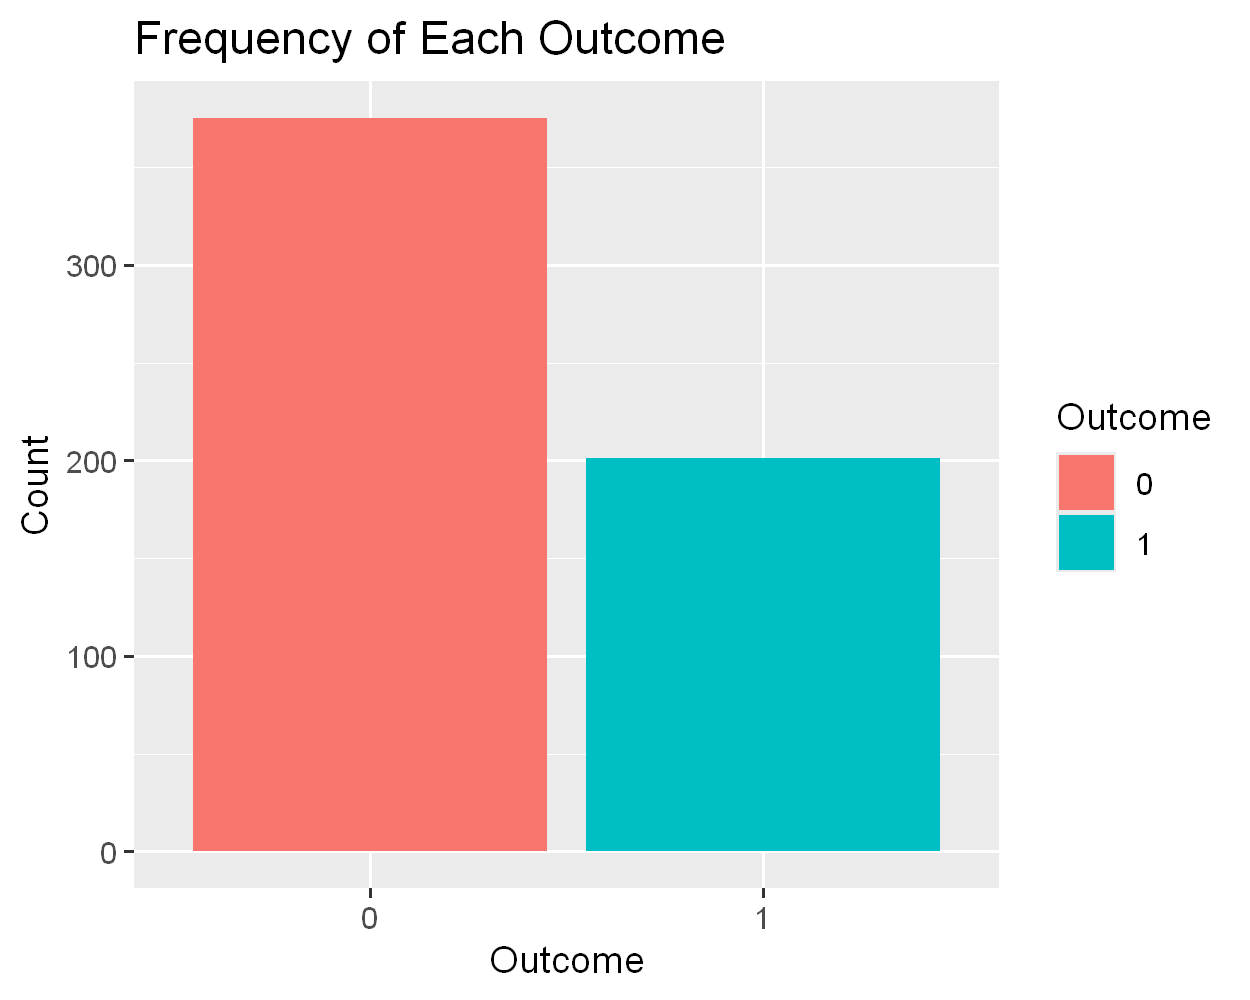

In [20]:
diabetes_train |> 
    count(Outcome) |> 
    ggplot(aes(x = Outcome, y = n, fill = Outcome)) +
    geom_bar(stat = "identity") +
    labs(title = "Frequency of Each Outcome", x = "Outcome", y = "Count") 
    

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

No it is **not balanaced**, there is almost a 2:1 ratio of non-diabetic to diabetic data points. 

***

Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [21]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6
0,Glucose,115.0
0,BMI,35.3


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

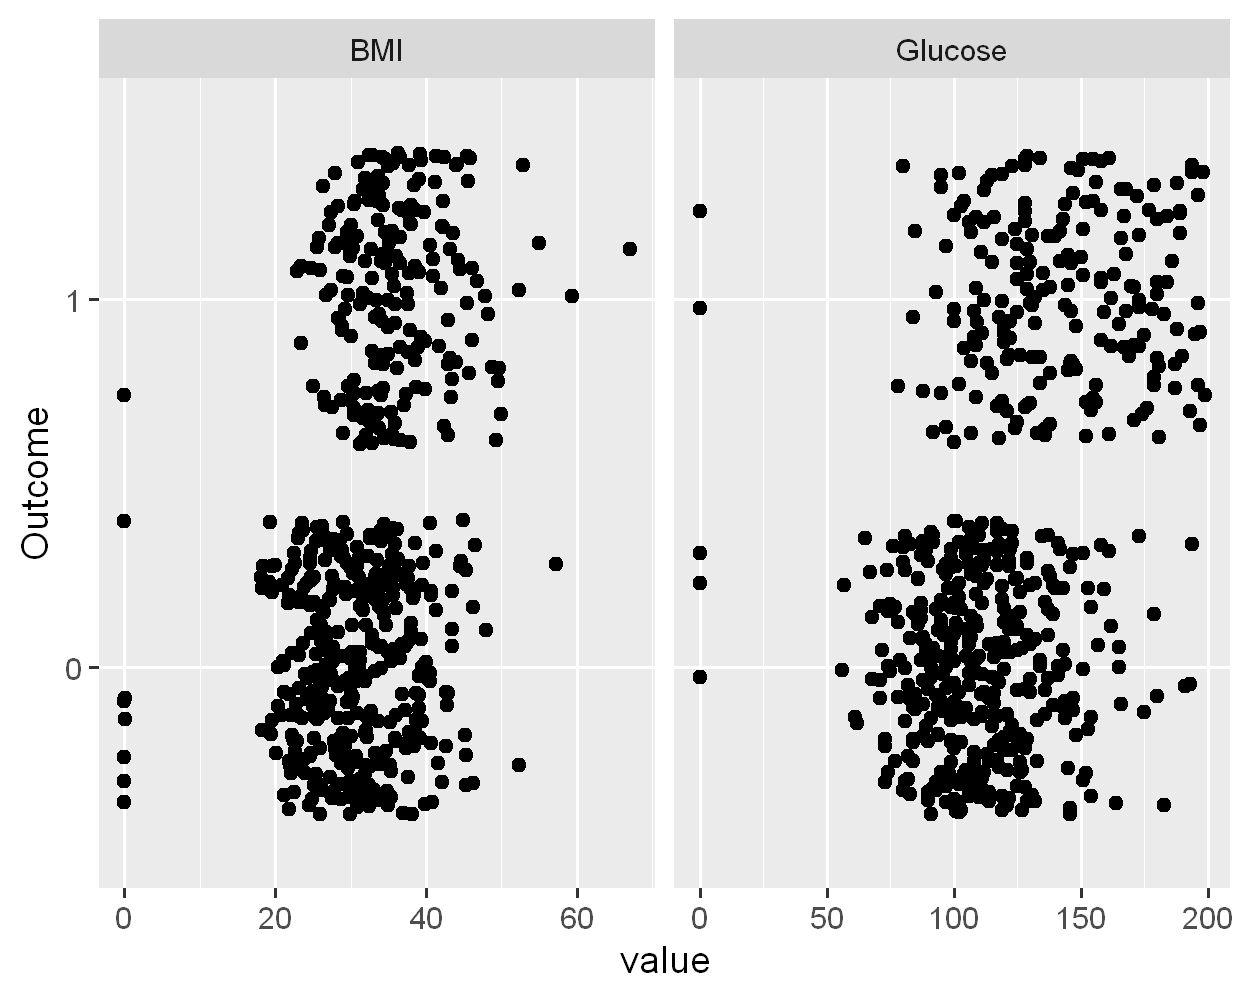

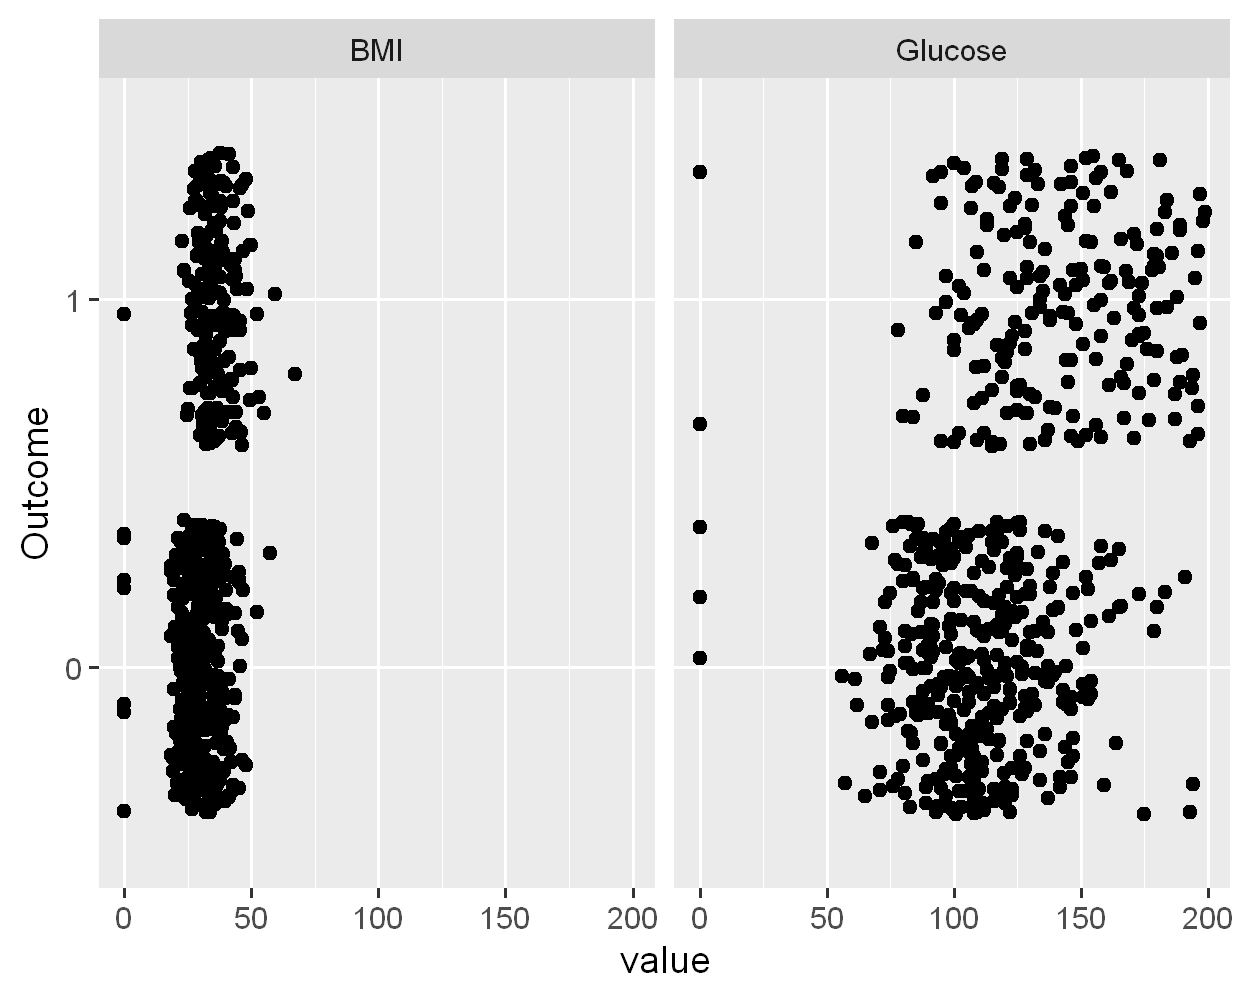

In [33]:
plot_df |>
    ggplot(aes(x = value, y = Outcome))+
    geom_jitter()+
    facet_wrap(~name, ncol = 2, scales = 'free_x')

plot_df |>
    ggplot(aes(x = value, y = Outcome))+
    geom_jitter()+
    facet_wrap(~name, ncol = 2)
    


In [34]:
#plot_df |>
 #   ggplot(aes(x = Outcome, y = value))+
#    geom_jitter()+
 #   facet_wrap(~name, ncol = 2, scales = 'free_x')

#plot_df |>
 #   ggplot(aes(x = Outcome, y = value))+
 #   geom_jitter()+
  #  facet_wrap(~name, ncol = 2)

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**


When you remove the `scales = 'free_x'` argument from the `facet_wrap` function, the x-axes of the facets are no longer allowed to have different scales. This means that both `BMI` will share the same x-axis scale as `Glucose`, making it harder to interpret the data.
***

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [35]:
rec =  recipe(Outcome ~ BMI + Glucose, data = diabetes_train) |> 
    step_naomit(everything()) |>   # remove missing values
    prep()     

mod = logistic_reg() |> set_engine('glm')
     
mod_fit = mod |> fit(Outcome ~ ., juice(rec))

tidy(mod_fit)



term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-7.82274430,0.711855831,-10.989226,4.306050e-28
BMI,0.08820230,0.015567286,5.665876,1.462756e-08
Glucose,0.03435769,0.003781907,9.084752,1.039357e-19


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [37]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)
diabetes_test_wPred |> head()

.pred_class,.pred_0,.pred_1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,0.9279862,0.07201378,1,85,66,29,0,26.6,0.351,31,0
1,0.3728928,0.62710723,8,183,64,0,0,23.3,0.672,32,1
1,0.3349728,0.66502719,0,137,40,35,168,43.1,2.288,33,1
0,0.6585284,0.34147164,10,139,80,0,0,27.1,1.441,57,0
0,0.6141386,0.38586139,1,103,30,38,83,43.3,0.183,33,0
0,0.5068308,0.49316923,3,126,88,41,235,39.3,0.704,27,0


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [38]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 112  37
         1  13  30

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

In [39]:
diabetes_test |> count(Outcome)

Outcome,n
<fct>,<int>
0,125
1,67



| P \ T  | 0 | 1 | 
| :---------- | :---------- | :---------- |
| 0         |   [112 / 125] | [37 / 67] (wrong) |
| 1          |  [ 13 / 125 ] (wrong)  | [30 / 67] |

- In the test dataset, the number of individuals who have diabetes is **67**, the model correctly predicted **30** out of these **67** individuals. 
- **13** individuals were predicted to have diabetes when they infact did not have diabetes. 
- For **125** individuals, **112** were correctly predicted to not have diabetes. 

All of these aspects suggest there is another factor other than Glucose and BMI to take into consideration what causes an individual to be diabetic. However Glucose and BMI seem to be a good factor in telling if an individual is **NOT diabetic**. 

***
